In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randrange

## Data Import and Prep ##

In [212]:
data = pd.read_csv('train.csv')
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)

# Split the data to train and test
# Data is divided by 255 to normalize (range 0,1)
train_data = data[:33600, 1:].transpose() / 255
train_labels = data[:33600 ,0]
train_m = 33600

test_data = data[33601:, 1:].transpose() / 255
test_labels = data[33601:, 0]

## Neural Network

In [244]:
def Relu(matrix):
    return np.maximum(matrix, 0)

def Deriv_Relu(matrix):
    return matrix > 0

# This one causes errors
# def Softmax(logits):
#     exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))  # Numerical stability improvement
#     return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

def Softmax(logits):
    logits = np.exp(logits) / sum(np.exp(logits))
    return logits

class Neural_Network:
    def __init__(self, a0, labels):
        # Weights and Biases
        self.w1 = np.random.rand(10, 784) - 0.5
        self.b1 = np.random.rand(10, 1) - 0.5
        self.w2 = np.random.rand(10, 10) - 0.5
        self.b2 = np.random.rand(10, 1) - 0.5
        
        # Others
        self.a0 = a0
        _,self.m = self.a0.shape
        self.labels = labels
        
        # one-hot encode labels
        self.y = np.zeros((self.labels.size, self.labels.max() + 1))
        self.y[np.arange(self.labels.size), self.labels] = 1
        self.y = self.y.T
        
    def forward_pass(self, x):
        # Hidden Layer
        self.z1 = self.w1.dot(x) + self.b1
        self.a1 = Relu(self.z1)
        
        # Output Layer
        self.z2 = self.w2.dot(self.a1) + self.b2
        self.a2 = Softmax(self.z2)
        
        return self.a2
    
    def calc_cost(self):
        # Cost Function (Mean Square Error)
        return np.sum(np.power((self.a2 - self.y), 2) / 2) / 784
     
    def backward_pass(self):
        self.dZ2 = self.a2 - self.y
        self.dW2 = 1 / self.m * self.dZ2.dot(self.a1.T)
        
        self.db2 = 1 / self.m * np.sum(self.dZ2)
        
        # We element wise multiply the derivative of Relu as Relu is an element-wise activation function
        self.dZ1 = self.w2.T.dot(self.dZ2) * Deriv_Relu(self.z1)
        self.dW1 = 1 / self.m * self.dZ1.dot(self.a0.T)
        
        self.db1 = 1 / self.m * np.sum(self.dZ1)
        
        return self.w1, self.w2, self.b1, self.b2
        
    def grad_descent(self, LR):
        self.w1 -= LR * self.dW1
        self.w2 -= LR * self.dW2
        self.b1 -= LR * self.db1
        self.b2 -= LR * self.db2
        
    def train(self, LR, epochs):
        for i in range(epochs):
            self.forward_pass(self.a0)
            self.backward_pass()
            self.grad_descent(LR)
            
            if i % 10 == 0:
                print("Iteration: ", i)
                print(self.get_accuracy(self.labels))
                print()

    def predict(self, t_data, t_labels):
        index = randrange(t_data.shape[1])
        current_image = t_data[:, index, None]
        
        prediction = self.forward_pass(t_data[:, index, None])
        
        label = t_labels[index]
        
        print("Label: ", label)
        print("Prediction: ", prediction.argmax())
        print("Confidence: ", prediction.max() * 100)
        
        current_image = current_image.reshape((28, 28)) * 255
        plt.gray()
        plt.imshow(current_image, interpolation='nearest')
        plt.show()

    def get_accuracy(self, labels):
        predictions = np.argmax(self.a2, 0)
        return np.sum(predictions == labels) / labels.size
    
    def load_model(self, w1, w2, b1, b2):
        self.w1 = np.genfromtxt(w1)
        self.w2 = np.genfromtxt(w2)
        self.b1 = np.genfromtxt(b1)
        self.b2 = np.genfromtxt(b2)
    
    def save_model(self):
        np.savetxt("Model/w1.csv", self.w1, delimiter=",")
        np.savetxt("Model/w2.csv", self.w2, delimiter=",")
        np.savetxt("Model/b1.csv", self.b1, delimiter=",")
        np.savetxt("Model/b2.csv", self.b2, delimiter=",")
        
    
    

In [225]:
x = Neural_Network(train_data, train_labels)

x.train(0.5, 500)

Iteration:  0
0.13095238095238096

Iteration:  10
0.42345238095238097

Iteration:  20
0.6244345238095238

Iteration:  30
0.5685416666666666

Iteration:  40
0.7492857142857143

Iteration:  50
0.7536309523809523

Iteration:  60
0.7675297619047619

Iteration:  70
0.8040178571428571

Iteration:  80
0.8153869047619048

Iteration:  90
0.8209226190476191

Iteration:  100
0.840922619047619

Iteration:  110
0.8430952380952381

Iteration:  120
0.845922619047619

Iteration:  130
0.8580654761904762

Iteration:  140
0.861547619047619

Iteration:  150
0.8606845238095238

Iteration:  160
0.8591071428571428

Iteration:  170
0.8682738095238095

Iteration:  180
0.8825595238095238

Iteration:  190
0.8850892857142857

Iteration:  200
0.8809821428571428

Iteration:  210
0.8768452380952381

Iteration:  220
0.8910714285714286

Iteration:  230
0.8936309523809524

Iteration:  240
0.8946726190476191

Iteration:  250
0.8926785714285714

Iteration:  260
0.878095238095238

Iteration:  270
0.8985714285714286

Itera

## Testing ##

Label:  3
Prediction:  3
Confidence:  93.81255080796734


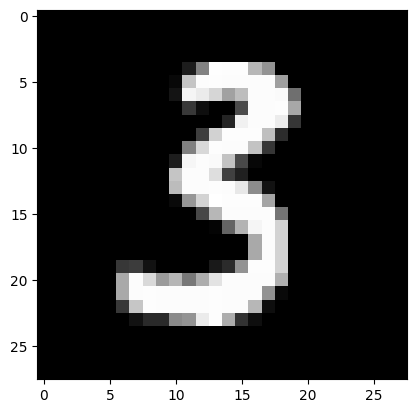

In [246]:
# Takes 1 random record and Tests
x.predict(test_data, test_labels)